In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
df.drop('User ID',axis=1,inplace=True)

In [8]:
df.head(100)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [9]:
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [10]:
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [11]:
df=pd.concat([gender,df],axis=1)

In [12]:
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,19000,0
1,1,Male,35,20000,0
2,0,Female,26,43000,0
3,0,Female,27,57000,0
4,1,Male,19,76000,0


In [13]:
df.drop(['Gender'],axis=1,inplace=True)

In [14]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


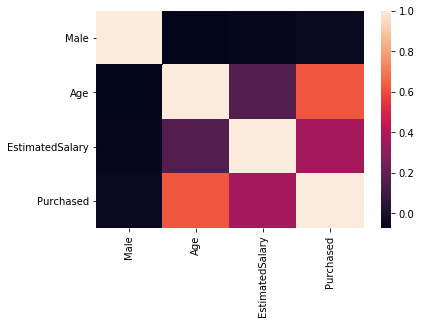

In [15]:
sns.heatmap(df.corr())

In [16]:
df.drop('Male',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
scaled_array=ss.fit_transform(df.drop('Purchased',axis=1))

In [20]:
X=pd.DataFrame(scaled_array,columns=df.columns[:-1])

In [21]:
y=df['Purchased']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.svm import SVC

In [25]:
model=SVC()

In [26]:
model.fit(X_train,y_train)

C:\Users\ajay gadhe\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
ypred=model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,ypred)

array([[74,  2],
       [ 3, 41]], dtype=int64)

In [30]:
#Accuracy= (74+41)/(74+41+3+2)